In [1]:
import numpy as np
import osmnx as ox
import networkx as nx
import time

import seaborn as sns
import matplotlib.pyplot as plt

import random
import pickle, os
import glob
import mlrfit as mf
import lrrouting as ldr

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mtype = "honolulu"

place = "Honolulu, HI, USA"
G, Adj, Dist, nodes_cc = ldr.dist_matrix_osmnx(place, directed=True, nodes=True)

m = n = Dist.shape[0]
diam_G = Dist.max()
w_min = Dist[Dist>0].min()
print(m, diam_G, w_min, (Adj>0).sum(), Adj.max())
print(f"{n=}")
print(np.histogram(Dist.flatten(), bins=5, density=True))

nsamples = int(np.sqrt(n))
info_ranks = {}

[6316, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
n_cc = 6316, n0 = 6382
in  degrees: {0: 0, 1: 1835, 2: 976, 3: 2815, 4: 678, 5: 12}
out degrees: {0: 0, 1: 1835, 2: 976, 3: 2815, 4: 678, 5: 12}
6316 131.0 1.0 15004 2
n=6316
(array([0.00695665, 0.02015476, 0.00844418, 0.00248606, 0.00012629]), array([  0. ,  26.2,  52.4,  78.6, 104.8, 131. ]))


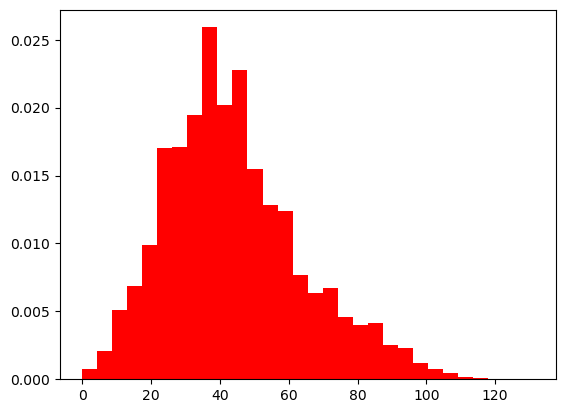

In [3]:
counts, bins = np.histogram(Dist, bins=30, density=True)
# plt.stairs(counts, bins)
plt.hist(bins[:-1], bins, weights=counts, color='r')
plt.show()

In [4]:
# fig, ax = ox.plot_graph(G, bgcolor="#ffffff", edge_color='k', edge_linewidth=0.2, node_color='k', node_size=2, figsize=(12, 12))

In [5]:
n = 6321
search_pattern = os.path.join("outputs/", f'*{mtype}*{n}*.pickle')
matching_files = sorted(glob.glob(search_pattern))

for fname in matching_files:
    rank = int(fname.split("_")[2][4:])
    with open(fname, 'rb') as handle:
        info_ranks[rank] = pickle.load(handle)[rank]

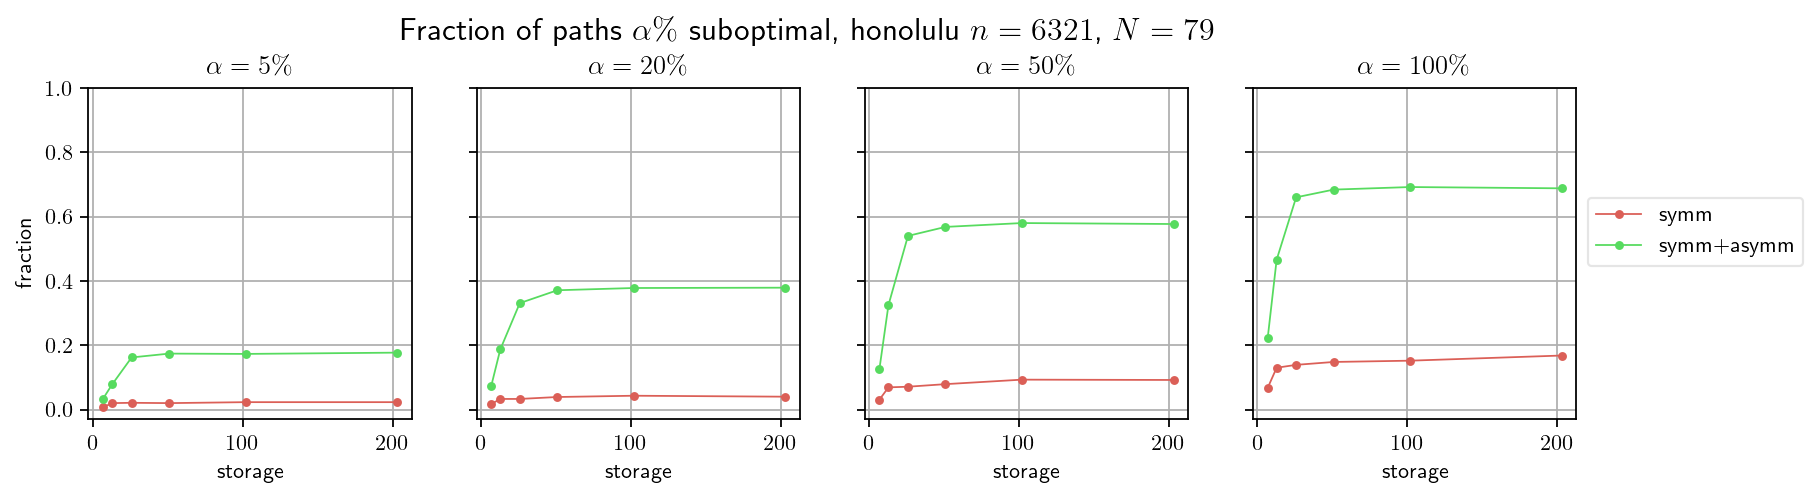

In [6]:
ldr.plot_fracs_subopt(info_ranks, list(info_ranks.keys()), fracs = [1.05, 1.2, 1.5, 2.0], dpi=160, figsize=(12, 3), 
                      marker='.', mtype=mtype+r" $n=%d$, $N=%d$"%(n, nsamples), ylim=[-3e-2, 1])

In [7]:
info_ranks.keys()

dict_keys([102, 13, 203, 26, 51, 7])

In [8]:
search_pattern = os.path.join("outputs/", f'{mtype}*{n}*.pickle')
matching_files = sorted(glob.glob(search_pattern))


for fname in matching_files:
    if not "nsp10_" in fname: continue
    rank = int(fname.split("_")[2][4:])
    with open(fname, 'rb') as handle:
        d1 = pickle.load(handle)[rank]
    # info_ranks[rank] = {"symm 1":d1["symm"], "symm+asymm 1":d1["symm+asymm"]}
    info_ranks[rank] = {r"$|I|/n=10\%$":d1["symm+asymm"]}
    for ns in [1, 100]:
        fname2 = fname.replace('nsp10', "nsp%d")%ns
        with open(fname2, 'rb') as handle:
            d2 = pickle.load(handle)[rank]
        # info_ranks[rank]["symm %d"%ns] = d2["symm"]
        info_ranks[rank][r"$|I|/n=%d\%%$"%(ns)] = d2["symm+asymm"]

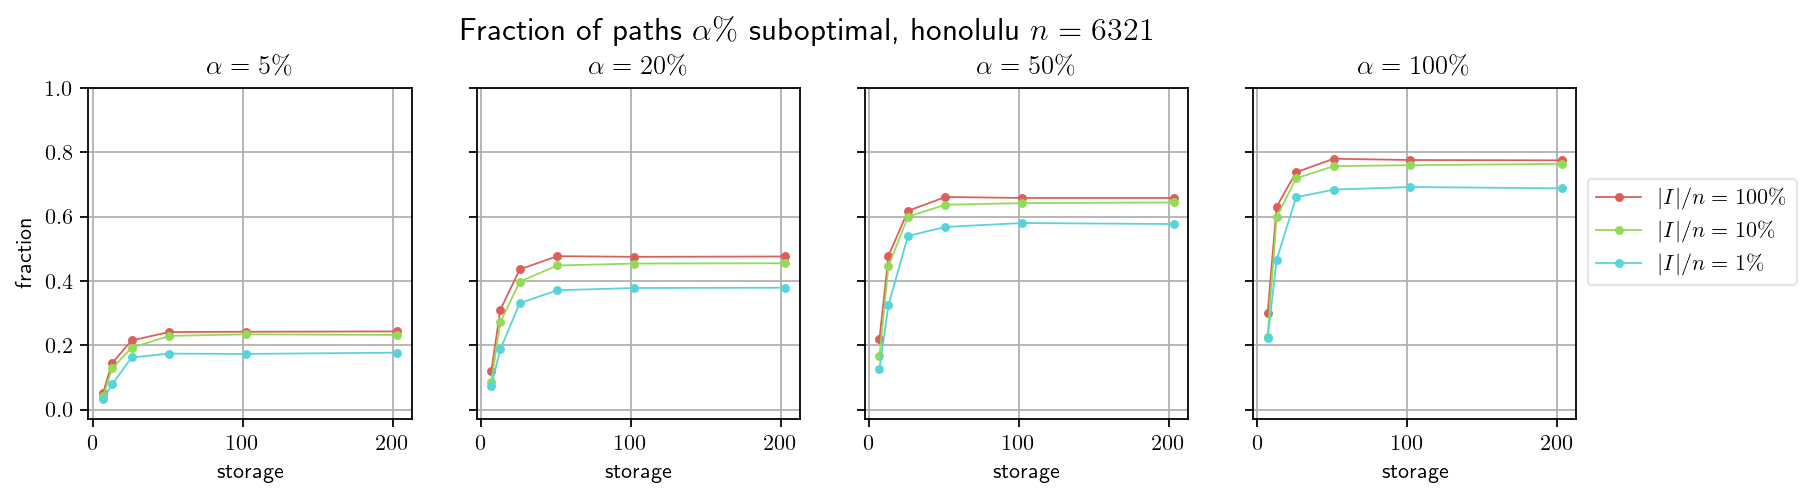

In [9]:
ldr.plot_fracs_subopt(info_ranks, list(info_ranks.keys()), fracs = [1.05, 1.2, 1.5, 2.0], dpi=160, figsize=(12, 3), 
                      marker='.', mtype=mtype+r" $n=%d$"%(n), ylim=[-3e-2, 1])

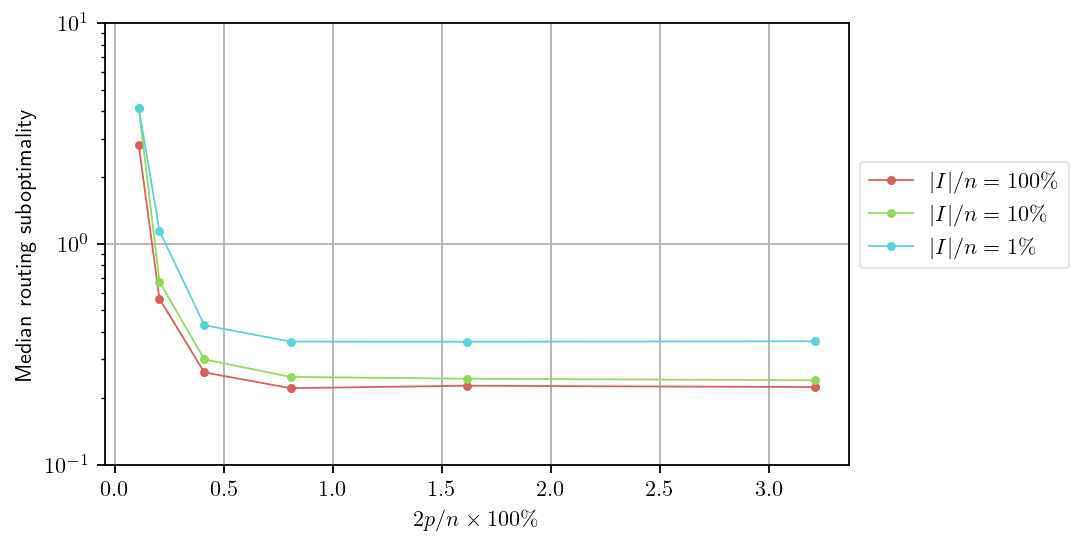

In [10]:
ldr.plot_median_storage(n, info_ranks, list(info_ranks.keys()), 
                      dpi=160, figsize=(6, 4), marker='.', 
                      mtype=mtype+r" $n=%d$"%(n), 
                      yticks=[1e-1, 1, 10])

In [11]:
r = list(info_ranks.keys())[0]
algos = sorted(info_ranks[r].keys())

ranks = np.array(sorted(info_ranks.keys()))

emb_rel_diff = {algo:[] for algo in algos}
for rank in ranks:
    rats = info_ranks[rank][r"$|I|/n=100\%$"]
    print(rank, np.round(rank / n  * 100, 3), np.median(rats["ratios"]))
    ldr.print_stats_moments(rats["r_rel_diff"])
    ldr.print_stats_moments(rats["c_rel_diff"])

7 0.111 3.8067345783814375
mean=12.98, M=4.23, SD=60.36, q_25=1.88, q_75=9.36, max=5268.43, min=0.00
mean=12.98, M=4.23, SD=60.36, q_25=1.88, q_75=9.36, max=5268.43, min=0.00
13 0.206 1.5645833333333332
mean=7.33, M=3.04, SD=33.87, q_25=1.31, q_75=6.42, max=3444.22, min=0.00
mean=7.33, M=3.04, SD=33.87, q_25=1.31, q_75=6.42, max=3444.22, min=0.00
26 0.411 1.2619167717528375
mean=4.50, M=1.46, SD=24.50, q_25=0.63, q_75=3.30, max=3053.60, min=0.00
mean=4.50, M=1.46, SD=24.50, q_25=0.63, q_75=3.30, max=3053.60, min=0.00
51 0.807 1.2222222222222223
mean=4.11, M=1.13, SD=22.73, q_25=0.44, q_75=2.81, max=2517.63, min=0.00
mean=4.11, M=1.13, SD=22.73, q_25=0.44, q_75=2.81, max=2517.63, min=0.00
102 1.614 1.227922077922078
mean=4.09, M=1.11, SD=22.60, q_25=0.42, q_75=2.80, max=2467.70, min=0.00
mean=4.09, M=1.11, SD=22.60, q_25=0.42, q_75=2.80, max=2467.70, min=0.00
203 3.212 1.224747474747475
mean=4.08, M=1.11, SD=22.59, q_25=0.42, q_75=2.80, max=2462.89, min=0.00
mean=4.08, M=1.11, SD=22.59,

In [12]:
np.round(ranks / n  * 100, 2)

array([0.11, 0.21, 0.41, 0.81, 1.61, 3.21])

In [13]:
r = list(info_ranks.keys())[0]
algos = sorted(info_ranks[r].keys())

ranks = np.array(sorted(info_ranks.keys()))

emb_rel_diff = {algo:[] for algo in algos}
for rank in ranks:
    rats = info_ranks[rank][r"$|I|/n=10\%$"]
    print(rank, np.round(rank / n  * 100, 3), np.median(rats["ratios"]))
    ldr.print_stats_moments(rats["r_rel_diff"])
    ldr.print_stats_moments(rats["c_rel_diff"])

7 0.111 5.146428571428572
mean=15.85, M=5.43, SD=71.98, q_25=2.34, q_75=11.69, max=6983.50, min=0.00
mean=14.87, M=5.10, SD=69.33, q_25=2.23, q_75=10.74, max=6165.59, min=0.00
13 0.206 1.6750471401634193
mean=7.17, M=2.94, SD=33.67, q_25=1.24, q_75=6.21, max=3327.49, min=0.00
mean=7.16, M=2.96, SD=33.85, q_25=1.25, q_75=6.16, max=3439.11, min=0.00
26 0.411 1.3
mean=4.43, M=1.44, SD=24.51, q_25=0.62, q_75=3.19, max=3028.82, min=0.00
mean=4.44, M=1.43, SD=24.61, q_25=0.63, q_75=3.14, max=3131.88, min=0.00
51 0.807 1.25
mean=4.02, M=1.11, SD=22.43, q_25=0.43, q_75=2.75, max=2473.23, min=0.00
mean=4.06, M=1.12, SD=22.69, q_25=0.44, q_75=2.74, max=2290.29, min=0.00
102 1.614 1.2451730418943534
mean=4.00, M=1.09, SD=22.26, q_25=0.42, q_75=2.74, max=2435.79, min=0.00
mean=4.04, M=1.11, SD=22.52, q_25=0.43, q_75=2.74, max=2193.50, min=0.00
203 3.212 1.2413793103448276
mean=4.00, M=1.09, SD=22.25, q_25=0.42, q_75=2.74, max=2427.30, min=0.00
mean=4.04, M=1.11, SD=22.50, q_25=0.42, q_75=2.74, max

In [14]:
8 / n

0.0012656225280809998

In [15]:
m = n = Dist.shape[0]
adjacency_list = ldr.adjacency_directed_list(Adj)
sources, targets = ldr.st_pairs(n, Dist, 1020)

rand_frac = 0.975
coeff = 10
print(f"{rand_frac=}")
pi_rows, pi_cols = ldr.adaptive_row_col(n, Dist, frac=rand_frac, coeff=coeff, percent=True)
rDist, cDist, pi_rows_c, pi_cols_c = ldr.sample_dist(n, pi_rows, pi_cols, Dist)

nsamples = pi_rows.size

rank = 13

rand_frac=0.975
nsamples=631, random_samples=615


In [16]:
print(f"\n{rank=}")
lr_dar, _, Z = ldr.dar_fast_cc(rank, pi_rows, pi_cols, pi_rows_c, pi_cols_c, rDist, cDist, adjacency_list, sources, targets, 
                           Dist, cc_max_iter=1000, n_init_cc=2, cg_eps=1e-8, cc_eps=1e-6, cg_max_iter=200, verbose=True, freq=500)


rank=13


Symmetric rank/2=6.5


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/parshakova.tanya/Documents/projects/lr_distributed_routing/lrrouting/cg.py:48: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, C))
  rho0 = np.dot(r, z)
/Users/parshakova.tanya/Documents/projects/lr_distributed_routing/lrrouting/cg.py:72: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  losses[k] = np.sqrt(np.dot(r, r)) / b_norm


t=0, loss=4118.803236523709
t=500, loss=19.201790360457135
loss=16.866269996667956, np.diff(np.array(losses)).max()=-0.0007788754085709115
t=0, loss=4123.715102324778
t=500, loss=18.29367312772811
loss=16.986225224808482, np.diff(np.array(losses)).max()=-0.0016954026388447119
time=1332.31, losses[0]=4118.80, losses[-1]=16.87, len(losses)=1000
Garbage collector: collected 37896 objects.

Split -> asymmetric fit rank=13
t=0, loss=45.24706036765153
t=500, loss=11.76316111595059
loss=11.523030531287185, np.diff(np.array(losses)).max()=-0.0004147927290070186
time=1151.88, losses[0]=45.25, losses[-1]=11.52, len(losses)=1000
Garbage collector: collected 39643 objects.
$\|x_i-y_j\|_2$
median_stretch=173.8%, mean_stretch=318.5%
%[ratio<2] = 55.94%, %[ratio<1.2] = 26.59%, %[ratio=1.] = 6.38%
Garbage collector: collected 0 objects.


In [17]:
lr_dar.nodes[20].b, lr_dar.nodes[20].c

(array([ 4.76373556,  4.58571468, -4.6744492 , -3.10667918,  1.28538272,
         2.21595866]),
 array([ 3.97872919,  1.66869188, -9.22432762,  0.74055525, -3.84613255,
        -4.67133375]))

# Route plotting

In [18]:
s = 4064; t = 5000
route_lr, w_lr = lr_dar.route(s, t)
ldr.valid_path(route_lr, w_lr, adjacency_list, s, t)

True

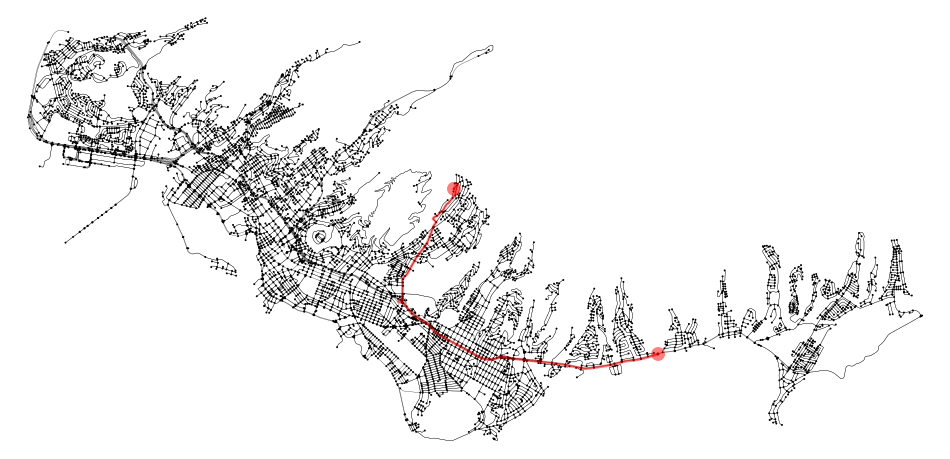

In [19]:
node_ids = list(G.nodes())
routes = [ldr.map_to_node_ids(route_lr, node_ids, nodes_cc)]
rc = ['c', 'y', 'r']

fig, ax = ox.plot_graph_route(G, routes[-1], route_color='r', bgcolor="#ffffff", \
                                edge_color='k', edge_linewidth=0.2, node_color='k', route_linewidth=2, node_size=2, figsize=(12, 12))

fig.savefig(f"plots/{mtype}_r{rank}_{s}_{t}.pdf", bbox_inches='tight')
plt.show()

In [20]:
rank / n

0.002058264724509183